# Geolocation of patients

In this notebook we will investigate 3 datasets sourced from Kaggle based on the the Coronavirus in Korea up to March 22, 2020.

The dataset may be updated on the Kaggle however, we will be specifically investigating the impact up to March 5, 2020. We will begin with getting the summary of the each dataset, take a look at how these datasets look visually, and perform further analysis. 

Our **primary goal** is to understand the severity of Coronacirus in Korea as of end of March, 2020. 
Our **secondary goal** is to understand route patterns of patients and their move patterns.

The datasets we have are patient.csv, route.csv, and time.csv. Each dataset will give us different perspectives of the impact of the Coronavirus.

Kaggle link
https://www.kaggle.com/kimjihoo/coronavirusdataset/tasks


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
folderpath = 'C:/Users/lyubo/Documents/DATA_networks/covid19/SouthKoreacoronavirusdataset/'

patient = pd.read_csv(folderpath+"PatientInfo.csv")
route = pd.read_csv(folderpath+"PatientRoute.csv")
time = pd.read_csv(folderpath+"Time.csv")

route.head(20)

,patient_id,global_num,date,province,city,latitude,longitude
0,1400000001,1,2020-01-19,Incheon,Jung-gu,37.460459,126.440680
1,1400000001,1,2020-01-20,Incheon,Seo-gu,37.478832,126.668558
2,1000000001,2,2020-01-22,Gyeonggi-do,Gimpo-si,37.562143,126.801884
3,1000000001,2,2020-01-23,Seoul,Jung-gu,37.567454,127.005627
4,2000000001,3,2020-01-20,Incheon,Jung-gu,37.460459,126.440680
5,2000000001,3,2020-01-22,Seoul,Gangnam-gu,37.524978,127.027718
6,2000000001,3,2020-01-22,Seoul,Gangnam-gu,37.503359,127.049177
7,2000000001,3,2020-01-23,Seoul,Gangnam-gu,37.524669,127.015911
8,2000000001,3,2020-01-23,Seoul,Gangnam-gu,37.529200,127.032597
9,2000000001,3,2020-01-24,Gyeonggi-do,Goyang-si,37.674192,126.776955


In [8]:
#working with dataframe "time"

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

get_df_name(time)



'time'

In [9]:
for data in [patient, route, time]:
    print("The dataset {} has {} observations and {} columns".format(get_df_name(data), 
                                                                     data.shape[0], data.shape[1]))


The dataset patient has 2243 observations and 18 columns
The dataset route has 175 observations and 7 columns
The dataset time has 62 observations and 7 columns



# Data for each patient 

Let's find out how many individual patients are considered.

In [12]:
print('unique patients', np.unique(route.patient_id.values))
print('unique patients number', len(np.unique(route.patient_id.values)))

unique patients [1000000001 1000000002 1000000003 1000000004 1000000005 1000000006
 1000000007 1000000008 1000000009 1000000010 1000000011 1000000012
 1000000013 1000000014 1200000031 1300000001 1300000002 1400000001
 2000000001 2000000002 2000000003 2000000004 2000000005 2000000006
 2000000007 2000000008 2000000009 2000000010 2000000011 5000000001
 5100000001]
unique patients number 31


In [13]:
print('unique patients', np.unique(patient.patient_id.values))
print('unique patients number', len(np.unique(patient.patient_id.values)))

patient.head()

unique patients [1000000001 1000000002 1000000003 ... 7000000002 7000000003 7000000004]
unique patients number 2243


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:

import plotly.express as px

uniq_patients = np.unique(route.patient_id.values)



def plot_route(pat_id,route):
    route_id = route[route.patient_id == pat_id] #dataframe for patient with id
    
    # loop through route_id - dataframe for each patient 
    
    #x = route_id.latitude
    #y = route_id.longitude
    
    fig = px.line_mapbox(route, lat="latitude", lon="longitude", color="global_num", zoom=3, height=300)

    fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=4, mapbox_center_lat = 41,
    margin={"r":0,"t":0,"l":0,"b":0})
    
    #fig.show()


# Patients routes 

Let us plot unique routes on a map.

In [ ]:
# loop through all unique patients 
for ind in range(0, len(uniq_patients)):
    plot_route(uniq_patients[ind], route)
    fig.show()


# Analysis of patients metadata

In [7]:
time.head()

,date,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
0,2020-01-20,1,0,1,0,0,1,0,1,0,0
1,2020-01-21,1,0,1,0,0,0,0,0,0,0
2,2020-01-22,4,3,1,0,0,3,3,0,0,0
3,2020-01-23,22,21,1,0,0,18,18,0,0,0
4,2020-01-24,27,25,2,0,0,5,4,1,0,0


This dataset consists of time series and integer values

For our purposes, we will look at the age of each patient and assume their birthday has already occured.

In [8]:
# knowing the age of the patients is more readable than knowing 
#  their birth year
patient = patient.rename(columns = {"birth_year":"age"})
patient['age'] = 2020 - patient['age']

In [9]:
patient

,id,sex,age,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,36.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,56.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,54.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,56.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,33.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,5762,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5762,5763,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5763,5764,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5764,5765,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated


In [10]:
def bar_plot(data, feat_indicator):
    
    # created if statements so that feat_indicator can take on the column position as an int or
    #    or take on the column name as a str
    if type(feat_indicator) != str:
        feature = data.columns[feat_indicator]
        
    else: 
        if feat_indicator in data.columns:
            feature = feat_indicator
        else:
            return("Feature name not in the dataset.")
        
    
    grouped_data = data.groupby("{}".format(feature)).size()
    
    fig = plt.figure()
    groups = grouped_data.keys()
    num_people = grouped_data
    ax = fig.add_axes([0,0,1,1]) # [left, bottom, width, height] 
    ax.bar(groups,num_people)
    plt.xlabel("{}".format(feature), fontsize = 15)
    plt.xticks(rotation = 90)
    plt.ylabel("Number of People", fontsize = 15)
    plt.title("Numer of People by {}".format(feature), fontsize = 20)

    plt.show()

    

We'll investigate each column in `patient`

In [11]:
list(patient.columns)

['id',
 'sex',
 'age',
 'country',
 'region',
 'group',
 'infection_reason',
 'infection_order',
 'infected_by',
 'contact_number',
 'confirmed_date',
 'released_date',
 'deceased_date',
 'state']

## ID

In [12]:
patient.apply(lambda x: x.isna().sum(), axis = 0)
# for df patient look at every column (axis = 0) and count the number of observations that are na

id                     0
sex                 5363
age                 5376
country                1
region              5374
group               5684
infection_reason    5626
infection_order     5731
infected_by         5696
contact_number      5719
confirmed_date         1
released_date       5734
deceased_date       5746
state                  1
dtype: int64

In [13]:
my_list = []
counter = 0 
for row in patient['country'].isnull():
    if row == True:
        my_list.append(counter)
    counter += 1
my_list

[102]

In [14]:
patient.iloc[102]

id                  103
sex                 NaN
age                 NaN
country             NaN
region              NaN
group               NaN
infection_reason    NaN
infection_order     NaN
infected_by         NaN
contact_number      NaN
confirmed_date      NaN
released_date       NaN
deceased_date       NaN
state               NaN
Name: 102, dtype: object

Therefore we do not know any information about patient 103.

In [15]:
patient['id'].unique().size

5766

There are 5766 unique id values. Since we have 5766 observations, therefore we have a unique identifier for every patient.

## Sex

In [16]:
patient['sex'].unique()

array(['female', 'male', nan], dtype=object)

We have 3 values for sex. Patients are either female, male, or we do not know the patient's sex.

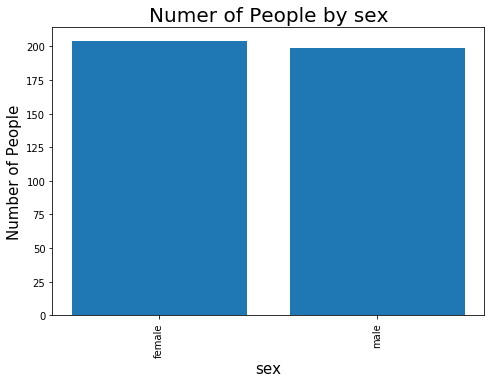

In [17]:
bar_plot(patient,'sex')


In [18]:
patient.groupby('sex').size()

sex
female    204
male      199
dtype: int64

Of the patients with known sex, there is approximately the same number of infected males and females. Therefore there is no bias for which sex is more likely to contract the coronavirus.

## Age

In [19]:
print('The youngest patient is {} years old and the oldest patient is {} years old'
      .format(patient['age'].min(), patient['age'].max()))


The youngest patient is 2.0 years old and the oldest patient is 88.0 years old


In [20]:
patient['age'].count()

390

In [190]:
patient['age'].median()

46.0

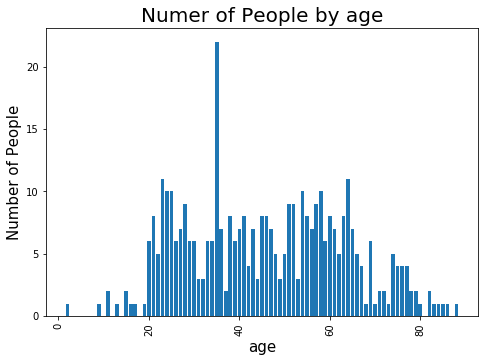

In [22]:
bar_plot(patient,'age')

The data does not look normally distribution, therefore we will look at the median rather than the mean. The median age is 46. 

## Country

*This refers to the patient's nationality*

In [23]:
patient_nat = patient.groupby("confirmed_date").size()
patient.groupby("country").size()

country
China          8
Korea       5756
Mongolia       1
dtype: int64

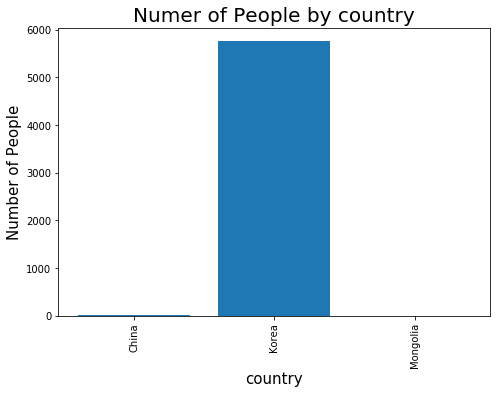

In [24]:
bar_plot(patient, 'country')

In [25]:
def patient_nationalities(data):
    data_grouped = patient.groupby("country").size()
    # get nationalities into a list
    nationalities = data_grouped.keys()
    total_count = 0 
    for item in range(len(data_grouped)):
        print("There are {} patients with nationalities from {}.".format(data_grouped[item], 
                                                                       nationalities[item]))
        total_count = total_count + data_grouped[item]
    print("There are {} patients with unknown nationality.".format(len(data) - total_count))

In [26]:
patient_nationalities(patient)

There are 8 patients with nationalities from China.
There are 5756 patients with nationalities from Korea.
There are 1 patients with nationalities from Mongolia.
There are 1 patients with unknown nationality.


Major of the patients are of Korean nationality.

## Region

region
Busan                    2
Chungcheongbuk-do        2
Chungcheongnam-do        1
Daegu                   46
Daejeon                 13
Gangwon-do               5
Gwangju                 10
Gyeongsangbuk-do       121
Jeju-do                  2
Jeollabuk-do             3
Ulsan                    2
capital area           181
filtered at airport      4
dtype: int64


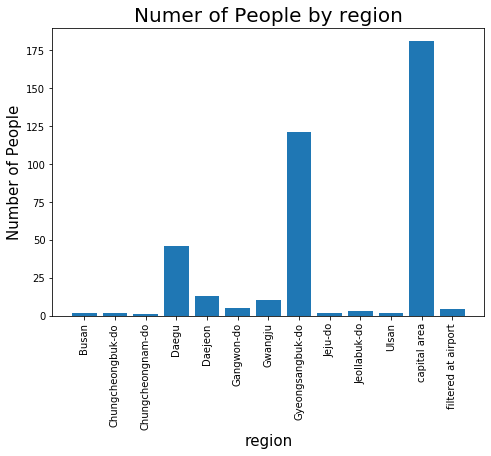

In [27]:
print(patient.groupby('region').size())

bar_plot(patient, 'region')

Majority of the patients are in the capital area (Seoul), Gyeongsangbuk-do, and Daegu respectively. 

## Infection Reason

In [207]:
print(patient['infection_reason'].count())
patient.groupby('infection_reason').size()

140


infection_reason
 visit to China                       1
contact with patient                 71
contact with patient in Japan         1
contact with patient in Singapore     2
pilgrimage to Israel                  6
residence in Wuhan                    2
visit to Cheongdo Daenam Hospital     1
visit to China                        1
visit to Daegu                       42
visit to Italy                        1
visit to Japan                        1
visit to Thailand                     2
visit to Vietnam                      1
visit to Wuhan                        8
dtype: int64

There were 140 patients who were able to provide a reason for how they were infected with the coronavirus. 71 people were infected with direct contact patient. This may include nurses, family, and friends. There was a large number of people were infected between the ages of 35 and 46. Majority of these patients may have been workers at health care center who attended to and took care of the patients already infected with the coronavirus. 

81% of patients either had direct contact with a current patient with the coronavirus or had visited Daegu


Visits to Korea's fourth largest city Daegu is also a top reason for the spread of the coronavirus.

In [29]:
list(patient.columns)

['id',
 'sex',
 'age',
 'country',
 'region',
 'group',
 'infection_reason',
 'infection_order',
 'infected_by',
 'contact_number',
 'confirmed_date',
 'released_date',
 'deceased_date',
 'state']

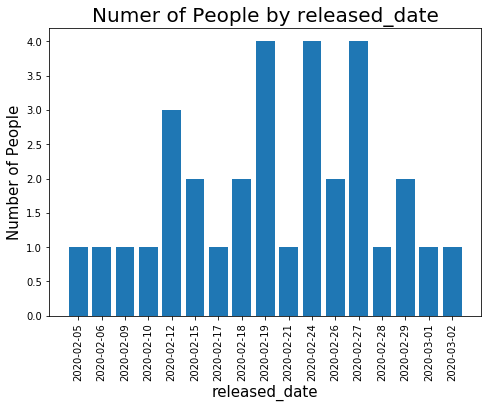

In [30]:
bar_plot(patient, 'released_date')

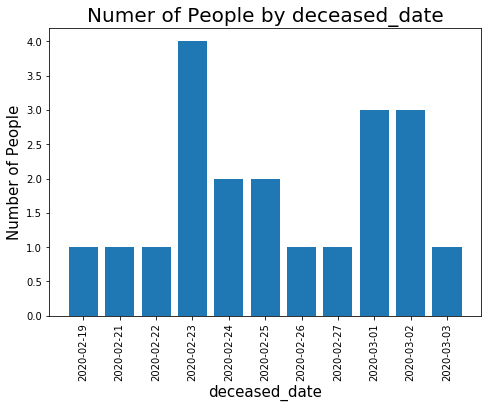

In [31]:
bar_plot(patient, 'deceased_date')

In [32]:
patient['released_date'].count()

32

In [33]:
patient['deceased_date'].count()

20

At first it may look like there are as many people being released as there are many people dying. However, we see there are only 32 individuals released and 20 individuals who is deceased. We must also consider there is 5766 individuals who have been infected by this virus. Currently, there is a 0.003 probably of dying; that is, **0.3% of the total number of cases result in death.**

In [34]:
age_deceased_df = patient.groupby(['age','deceased_date']).size()
indexes= []
for i in range(patient.shape[0]):
    if patient['deceased_date'].notnull()[i] == True:
        indexes.append(i)
        
indexes

print('we have the ages of {} people.'.format(len(indexes)))

we have the ages of 20 people.


age    64.35
dtype: float64


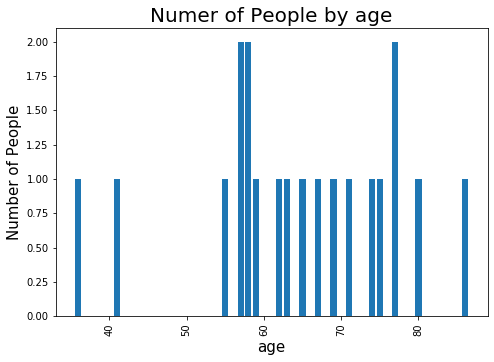

In [35]:
age_df = pd.DataFrame(patient['age'][indexes])
print(age_df.mean())
bar_plot(age_df, 'age')

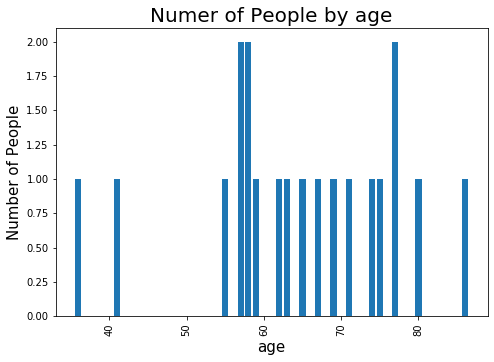

In [186]:
# another way to see the ages of the patients who have died of coronavirus
deceased_t_f = patient['deceased_date'].notnull()

deceased = []
for val in range(len(deceased_t_f)):
    if deceased_t_f[val] == True:
        deceased.append(1)
    else:
        deceased.append(0)
deceased = pd.DataFrame(deceased)

patient['deceased'] = deceased

dead = patient['deceased'] == 1
ages = patient['age']>0
age_dead = patient[ages & dead]

print("age")
bar_plot(age_dead, 'age')

The number of deaths per age is fairly evenly distributed, therefore we can look at the mean. The mean is 64.35. 

In Korea and North America, a person with senior status is described as a person who is at least 65 years of age. Since the average age of the individuals who are deceased are above 64, then seniors have the most risk after being exposed to the coronavirus. 

In [36]:
age_dd = pd.DataFrame(patient[['age', 'deceased_date']])
age_dd


# could consider visualing the number of deaths per 
#  each range of age groups 

,age,deceased_date
0,36.0,NaN
1,56.0,NaN
2,54.0,NaN
3,56.0,NaN
4,33.0,NaN
...,...,...
5761,NaN,NaN
5762,NaN,NaN
5763,NaN,NaN
5764,NaN,NaN


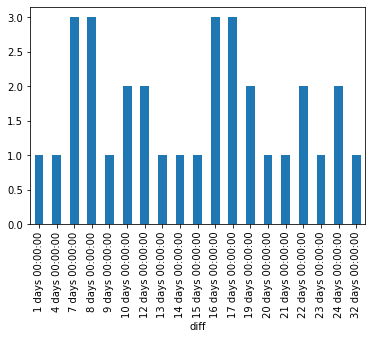

In [38]:
released = pd.to_datetime(patient['released_date'])
confirmed = pd.to_datetime(patient['confirmed_date'])

days_in_hospital = pd.DataFrame({'diff':released - confirmed})

days_in_hospital.groupby('diff').size().plot.bar()


In [39]:
print('mean is, ', days_in_hospital.mean())
print('median is, ',days_in_hospital.median())

mean is,  diff   14 days 16:30:00
dtype: timedelta64[ns]
median is,  diff   15 days 12:00:00
dtype: timedelta64[ns]


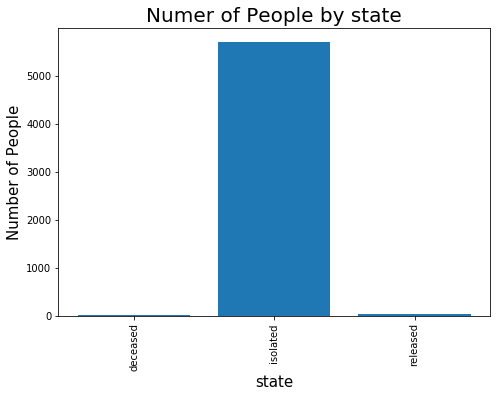

In [40]:
bar_plot(patient, 'state')

In [188]:
patient.groupby('state').size()

state
deceased      20
isolated    5710
released      35
dtype: int64

There has only been a small number of people released from the hospital and is not deceased. The present is presumed to be in isolation. The median time a person spent in the hospital is 15 days. Which is 1 day more than the recommended 15 while the average time is 14 days. By either metric, patients are kept isolated for approximately 2 weeks. There are also some individuals who are isolated for over the recommended and average time of 14 days (2 weeks). 

In [41]:
patient.groupby('state').size()

state
deceased      20
isolated    5710
released      35
dtype: int64

We see there are many more people who are being isolated than released or are deceased. It is likely most of these individals are between the ages of 35 to 46 and had contracted the coronavirus 